In [ ]:
!wget https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0

--2020-12-01 16:03:23--  https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vynypakezgqkchf/CovidDataset.rar [following]
--2020-12-01 16:03:24--  https://www.dropbox.com/s/raw/vynypakezgqkchf/CovidDataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbb68c676397465754654dcc588.dl.dropboxusercontent.com/cd/0/inline/BEQu_9o1Bg3updOMgz8YNnZXEjXntE7JuqkqVzu0iBk0qMlLJsmiOs28YCFD-N9V3w7LrMInnAAEV492FtMxy5I8j9_4CvxbITWbPKV-WYFiSl1fkTjQFInF8nZraxKTJWw/file# [following]
--2020-12-01 16:03:24--  https://ucbb68c676397465754654dcc588.dl.dropboxusercontent.com/cd/0/inline/BEQu_9o1Bg3updOMgz8YNnZXEjXntE7JuqkqVzu0iBk0qMlLJsmiOs28YCFD-N9V3w7LrMInnAAEV492FtMxy5I8j9_4CvxbI

In [ ]:
!pip install unrar

In [ ]:
!unrar x CovidDataset.rar\?dl\=0


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from CovidDataset.rar?dl=0

Creating    CovidDataset                                              OK
Creating    CovidDataset/Train                                        OK
Creating    CovidDataset/Train/Covid                                  OK
Extracting  CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       0%  OK 
Extracting  CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg       0%  OK 
Extracting  CovidDataset/Train/Covid/0a7faa2a.jpg                          0%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg       0%  1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg       1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg       1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300682-main.p

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image


In [ ]:


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 192 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 192 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 51s 9s/step - loss: 1.1358 - accuracy: 0.5208 - val_loss: 0.6880 - val_accuracy: 0.5938
Epoch 2/10
6/6 [==============================] - 50s 8s/step - loss: 0.6613 - accuracy: 0.6406 - val_loss: 0.6511 - val_accuracy: 0.7031
Epoch 3/10
6/6 [==============================] - 50s 8s/step - loss: 0.5225 - accuracy: 0.7917 - val_loss: 0.4124 - val_accuracy: 0.9531
Epoch 4/10
6/6 [==============================] - 54s 9s/step - loss: 0.4284 - accuracy: 0.8073 - val_loss: 0.3876 - val_accuracy: 0.9375
Epoch 5/10
6/6 [==============================] - 50s 8s/step - loss: 0.3639 - accuracy: 0.8594 - val_loss: 0.2923 - val_accuracy: 0.9375
Epoch 6/10
6/6 [==============================] - 50s 8s/step - loss: 0.2707 - accuracy: 0.9010 - val_loss: 0.2168 - val_accuracy: 0.9219
Epoch 7/10
6/6 [==============================] - 50s 8s/step - loss: 0.2171 - accuracy: 0.9062 

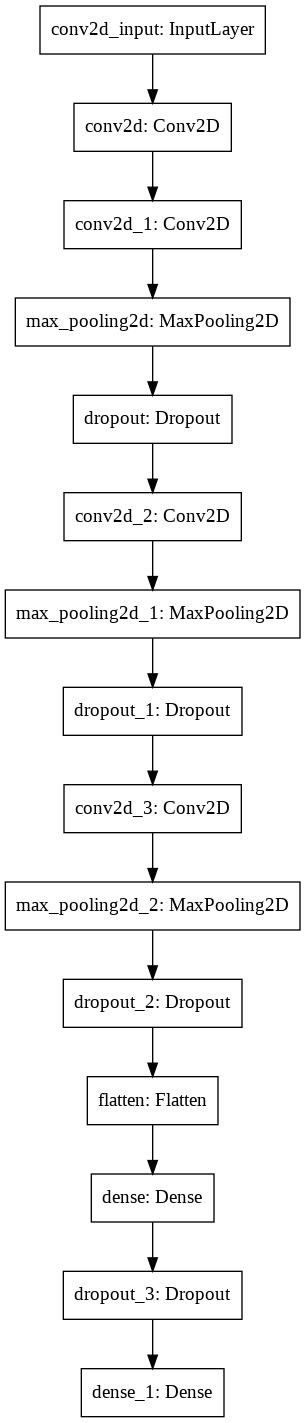

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

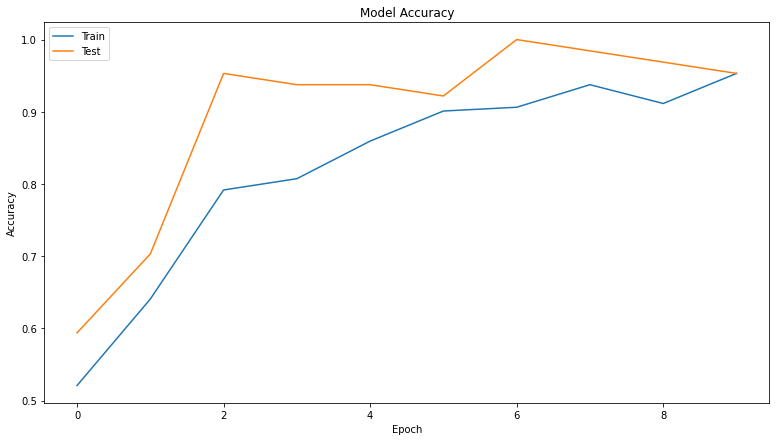

In [ ]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")

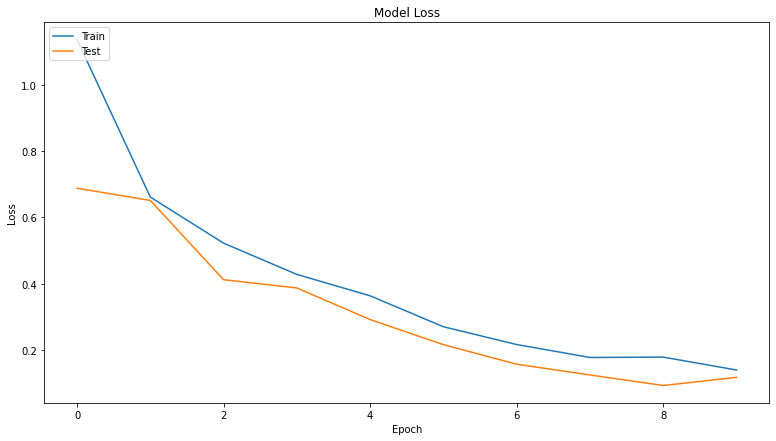

In [ ]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")

In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.12294042855501175, 0.9635416865348816]

In [ ]:
model.evaluate_generator(validation_generator)

[0.12191865593194962, 0.9583333134651184]

In [ ]:
model.save("model_adv.h5")

In [ ]:
model = load_model('model_adv.h5')  # model_adv.h5

In [ ]:
import os

In [ ]:
y_test= []
y_actual= []

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img= image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = int(model.predict(img) > 0.5) 
  y_test.append(p)                           
  y_actual.append(1)

In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img= image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  p = int(model.predict(img) > 0.5)   
  y_test.append(p)             
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual ,y_test)

In [ ]:
import seaborn as sns 

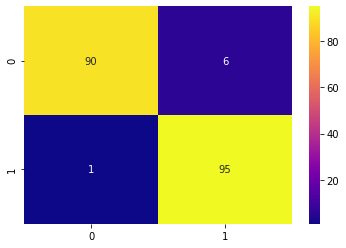

In [ ]:
sns.heatmap(cm, cmap="plasma", annot=True)

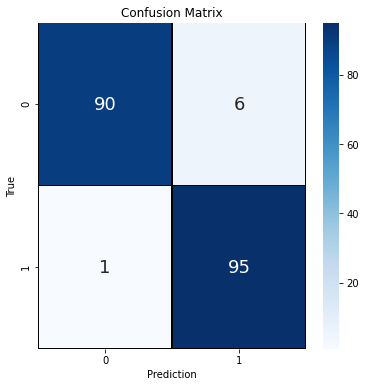

In [ ]:
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(cm,annot = True, linewidths = 0.3,cmap = "Blues",annot_kws = {"size": 18}, linecolor = "black", fmt = ".0f", ax=ax )
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_actual, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        96
           1       0.94      0.99      0.96        96

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192

